# Without Data Preprocessing

In [154]:
import pandas as pd

In [155]:
!wget https://raw.githubusercontent.com/andrychowanda/COMP6577/master/titanic_train.csv

--2025-02-13 05:11:01--  https://raw.githubusercontent.com/andrychowanda/COMP6577/master/titanic_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72499 (71K) [text/plain]
Saving to: ‘titanic_train.csv.11’

titanic_train.csv.1 100%[===================>]  70.80K  --.-KB/s    in 0.002s  

2025-02-13 05:11:02 (32.2 MB/s) - ‘titanic_train.csv.11’ saved [72499/72499]



In [156]:
dataTitanic = pd.read_csv('titanic_train.csv')
print(dataTitanic.info())
print(dataTitanic.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB
None
       passenger_id     pclass         age       sibsp       parch  \
count    850.000000  850.0

In [157]:
print(dataTitanic["survived"].value_counts())

survived
0    537
1    313
Name: count, dtype: int64


In [158]:
dataTitanic2 = dataTitanic[["pclass", "age", "sibsp", "fare", "parch", "survived"]]
dataTitanic2 = dataTitanic2.dropna()
print(dataTitanic2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 675 entries, 1 to 849
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    675 non-null    int64  
 1   age       675 non-null    float64
 2   sibsp     675 non-null    int64  
 3   fare      675 non-null    float64
 4   parch     675 non-null    int64  
 5   survived  675 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 36.9 KB
None


In [159]:
X = dataTitanic[["pclass", "age", "sibsp", "parch", "fare"]]
Y = dataTitanic["survived"]

In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [161]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [162]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_train, Y_train)

RandomForestClassifier()

In [163]:
from sklearn.metrics import accuracy_score
Y_pred = model.predict(X_test)
print(accuracy_score(Y_test, Y_pred))
Y_pred2 = model2.predict(X_test)
print(accuracy_score(Y_test, Y_pred2))

0.6411764705882353
0.7176470588235294


# With Data Preprocessing

In [164]:
dataTitanic.describe()

,passenger_id,pclass,age,sibsp,parch,fare,body,survived
count,850.000000,850.00000,676.000000,850.000000,850.000000,849.000000,73.000000,850.000000
mean,662.816471,2.32000,29.519847,0.522353,0.382353,34.012701,165.821918,0.368235
std,380.751936,0.83853,14.562243,1.112132,0.879511,53.705779,99.068487,0.482610
min,1.000000,1.00000,0.166700,0.000000,0.000000,0.000000,4.000000,0.000000
25%,332.250000,2.00000,20.000000,0.000000,0.000000,7.895800,75.000000,0.000000
50%,676.500000,3.00000,28.000000,0.000000,0.000000,14.108300,166.000000,0.000000
75%,992.250000,3.00000,37.000000,1.000000,0.000000,31.000000,260.000000,1.000000
max,1307.000000,3.00000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


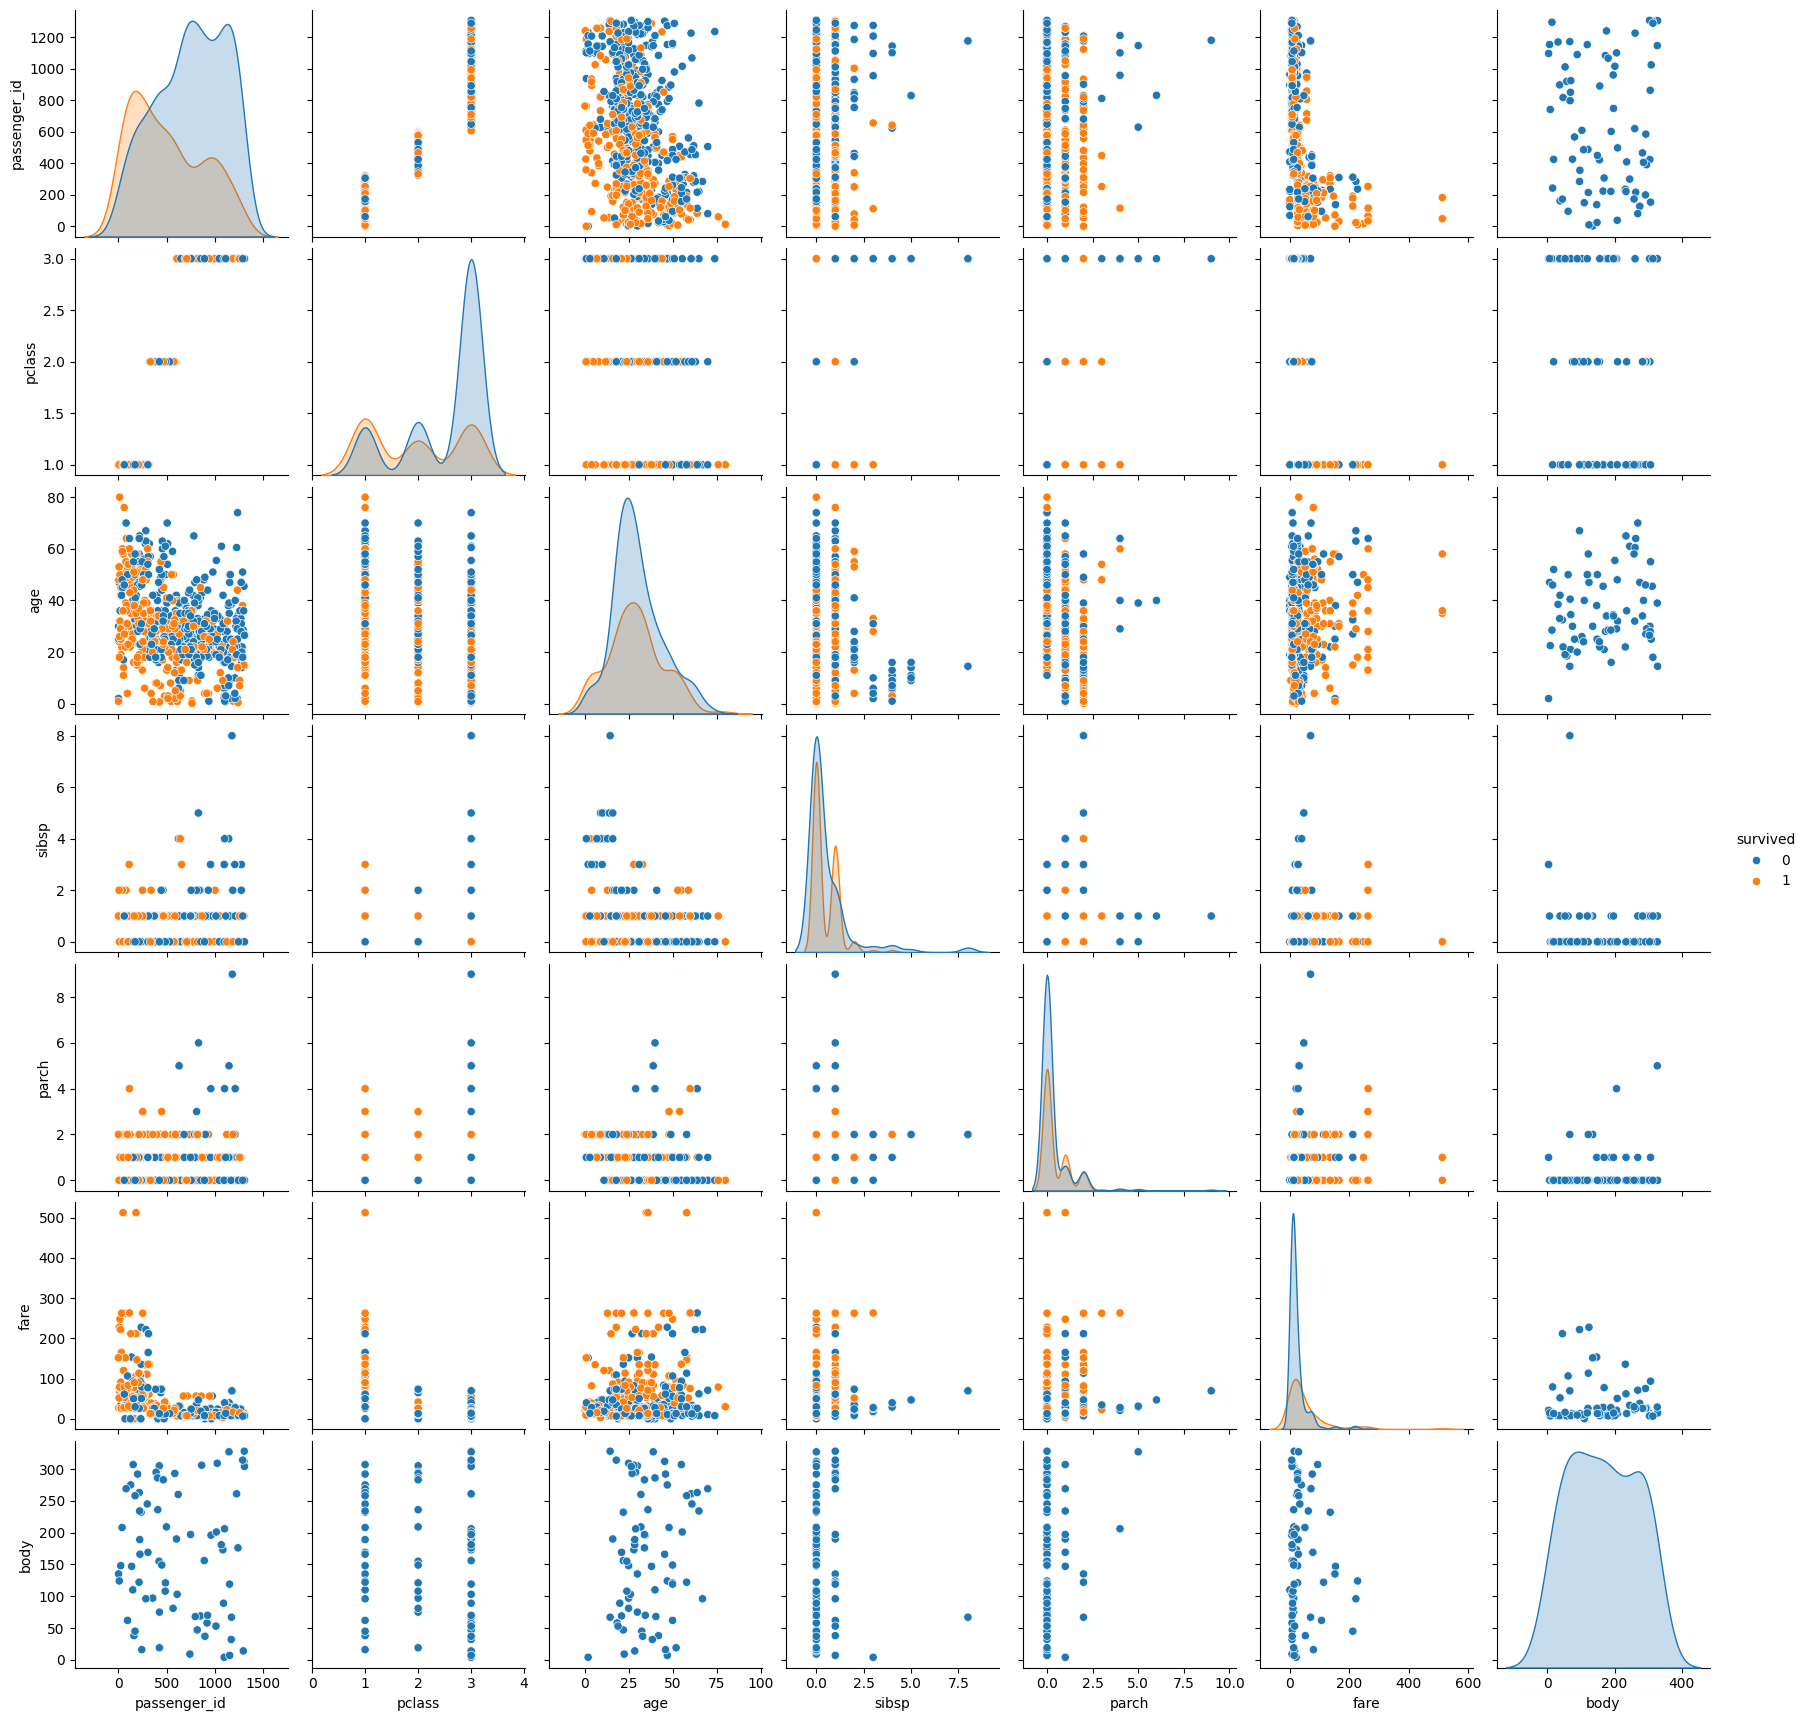

In [165]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.pairplot(dataTitanic, hue="survived")
plt.show()

<Axes: >

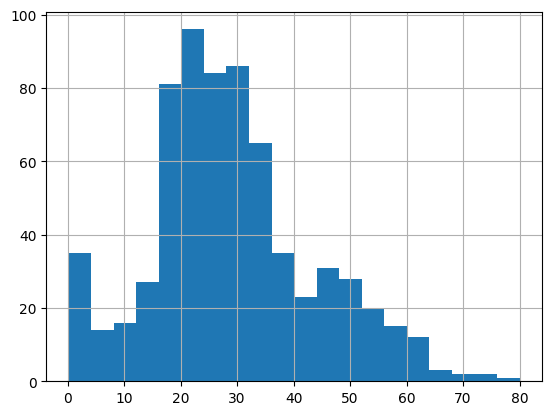

In [166]:
dataTitanic["age"].hist(bins=20)

<Axes: >

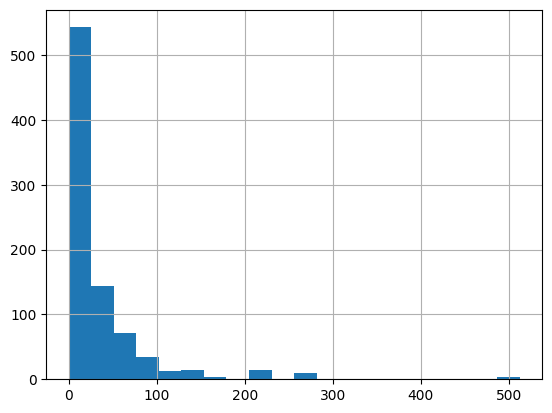

In [167]:
dataTitanic["fare"].hist(bins=20)

<ipython-input-168-c99164e39ccb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(dataTitanic[cols], palette="viridis")
<ipython-input-168-c99164e39ccb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(dataTitanic[cols], palette="viridis")
<ipython-input-168-c99164e39ccb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(dataTitanic[cols], palette="viridis")


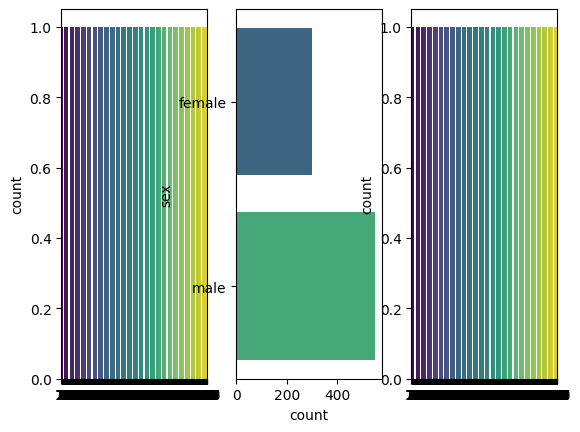

In [168]:
cols = ["pclass", "sex", "survived"]
for i, cols in enumerate(cols, 1):
  plt.subplot(1, 3, i)
  sb.countplot(dataTitanic[cols], palette="viridis")

plt.show()


<Axes: xlabel='sex', ylabel='survived'>

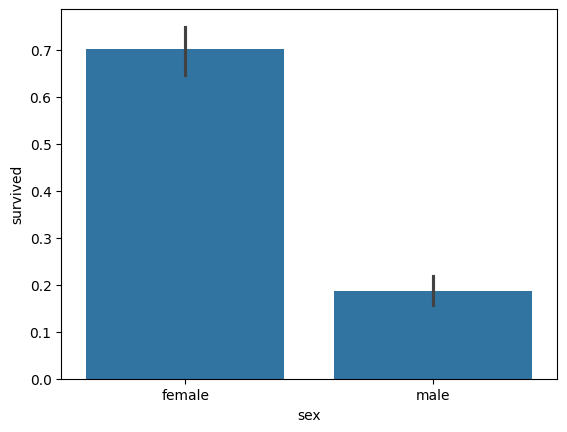

In [169]:
sb.barplot(x="sex", y="survived", data=dataTitanic)

In [170]:
# Fill in missing values
dataTitanic.info()
dataTitanic["age"] = dataTitanic["age"].fillna(dataTitanic["age"].mean) # Age -> mean
# dataTitanic["fare"] = dataTitanic["fare"].fillna(dataTitanic["fare"].median) # Fare -> mean
dataTitanic["cabin"] = dataTitanic["cabin"].fillna("U")
dataTitanic = dataTitanic.dropna(subset=["embarked"]) # Embarked -> drop
dataTitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 849 entries, 0 to 849
Data columns (total 15 columns):
 

In [174]:
print(dataTitanic["cabin"].value_counts())
dataTitanic["cabin"] = dataTitanic["cabin"].map(lambda x: x[0])
print(dataTitanic["cabin"].value_counts())

cabin
U    659
C     62
B     44
D     31
E     24
F     12
A     12
G      4
T      1
Name: count, dtype: int64
cabin
U    659
C     62
B     44
D     31
E     24
F     12
A     12
G      4
T      1
Name: count, dtype: int64


In [178]:
# convert non numerical data
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataTitanic["sex"] = encoder.fit_transform(dataTitanic["sex"])
dataTitanic["cabin"] = encoder.fit_transform(dataTitanic["cabin"])
dataTitanic["embarked"] = encoder.fit_transform(dataTitanic["embarked"])
dataTitanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 849 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  849 non-null    int64  
 1   pclass        849 non-null    int64  
 2   name          849 non-null    object 
 3   sex           849 non-null    int64  
 4   age           849 non-null    object 
 5   sibsp         849 non-null    int64  
 6   parch         849 non-null    int64  
 7   ticket        849 non-null    object 
 8   fare          848 non-null    float64
 9   cabin         849 non-null    int64  
 10  embarked      849 non-null    int64  
 11  boat          307 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      849 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 106.1+ KB


<Axes: >

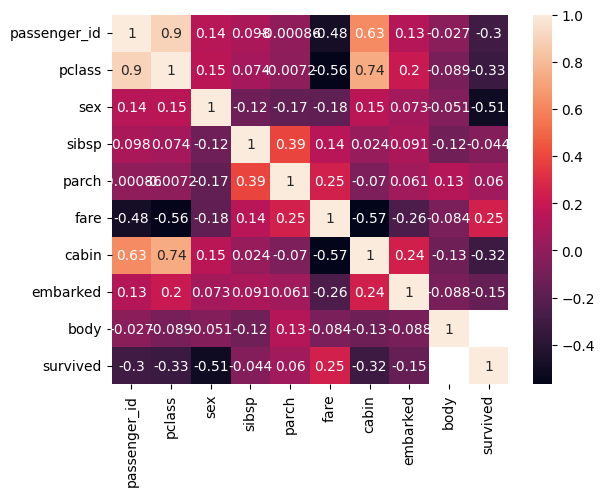

In [182]:
dataCorr = dataTitanic.corr(numeric_only=True)
sb.heatmap(dataCorr, annot=True)

In [185]:
X = dataTitanic[["sex", "pclass", "cabin", "fare", "embarked"]]
Y = dataTitanic["survived"]

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [187]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [188]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_train, Y_train)

RandomForestClassifier()

In [192]:
from sklearn.metrics import accuracy_score

# Train set
print("Training accuracies:")
Y_pred = model.predict(X_train)
print("Decision Tree " + str(accuracy_score(Y_train, Y_pred)))
Y_pred2 = model2.predict(X_train)
print("Random Forest " + str(accuracy_score(Y_train, Y_pred2)))

# Test set
print("Testing accuracies:")
Y_pred = model.predict(X_test)
print("Decision Tree " + str(accuracy_score(Y_test, Y_pred)))
Y_pred2 = model2.predict(X_test)
print("Random Forest " + str(accuracy_score(Y_test, Y_pred2)))

Training accuracies:
Decision Tree 0.9248895434462445
Random Forest 0.9234167893961709
Testing accuracies:
Decision Tree 0.7529411764705882
Random Forest 0.7705882352941177
